In [ ]:
###################################
# Lab 2: Linked Lists and Sorting #
###################################

###
# Setup
###

# Enrollment link: http://rosalind.info/classes/enroll/083764b484/
# Course link: http://rosalind.info/classes/704/ (was 581 last year)

# BMI2005/
# labs/
#     lab1/
#         lab1.ipynb
#     rosalind/
#         rosalind_dna.txt
#         rosalind_gc.txt


In [1]:
'''
Problem 1: Naive peak finding.
In class we discussed an algorithm to return a peak in a 1d array. 
The code is shown below.
a) With the example array a, what are the peak(s)? 5, 7, and 8
b) Which peak is returned, and why? 7
c) What is the runtime of this algorithm? O(n)
'''
a = [6, 7, 4, 3, 8, 1, 4, 5]

def naive_peak_1d(a):
    n = len(a)
    for i in range(n):
        # check corner case at beginning
        if i == 0 and a[i] >= a[i+1]:
            return a[i]
        elif a[i] > a[i+1] and a[i] >= a[i-1]:
            return a[i]
        # check corner case at the end
        elif i == (n-1) and a[n-1] >= a[n-2]:
            return a[i]

naive_peak_1d(a)


7

In [3]:
'''
Problem 2:
Rosalind: Insertion Sort

Translate the following pseudocode into python and verify 
its performance on the downloaded file 'rosalind_ins.txt'

insertion_sort(A[1..n])
    for i <- 2 to n do
        k <- i
        while k > 1 and A[k] < A[k-1]
            SWAP(A[k-1], A[k])
            k <- k -1

Input: A string A of integers separated by spaces, e.g. A = '-323 2 32 ... 3'

Output: The number of times the swap operation was performed (hint: this will require 
modifying the pseudocode a little bit) and (optionally) the sorted array.

'''
            
#temp = A[k-1]
#A[k-1] = A[k]
#A[k] = temp

# free parsing function
import numpy as np
with open('/Users/helenabelloff/Downloads/rosalind_ins (1).txt', 'r') as f:
    f.readline() # skips the line indicating number of entries
    A = np.array([int(x) for x in f.readline().strip().split(' ')])
    # f.readline() = '-323 2 32 ... 3\n'
    # f.readline().strip() = '-323 2 32 ... 3'
    # f.readline().strip().split(' ') = ['-323', '2', '32', ... '3']
    
# TO DO
def insertion_sort(A):
    count = 0
    for i in range(1,len(A)):
        k = i
        while k > 0 and A[k] < A[k-1]:
            A[k], A[k-1] = A[k-1], A[k]
            k = k - 1
            count += 1
    return count, A

count, sorted_A = insertion_sort(A)
print(count)


242764


In [7]:
'''
Problem 3. Comparing insertion and selection sorts
(a) Using the array A = E X A M P L E draw traces for each outer loop 
iteration of insertion and selection sort.

(b) If the input array is already sorted, what are the runtimes of 
selection and insertion sort? Which is faster? selection sort O(n^2), insertion sort O(n), insertion sort is faster

(c) Describe the worst-case input array. If the array is reversed order O(n^2)

(d) What is the expected runtime of insertion sort on an array with only 3 unique 
values relative to the inputs in (b) and (c)? 

Note that an analytical formula is not expected (e.g. O(n^3/2)) but rather empirical 
demonstration is sufficient, i.e. conduct a doubling experiment (from n = 1 to n = 2048) 
and empirically graph on a log-log plot the runtimes as a function of problem size.
- Create a function time_trial() that takes in an array as input and returns the time it 
  takes for insertion sort to run on it.
- Create a function test_n() that returns the runtimes for a sorting algothrim on best, mid case 
  (defined as the 3 unique values array)and worst case arrays as a function of n (their length). 
  This function should generate the arrays in the process.
'''
# selection
def selection_sort(A):
    for i in range(len(A)):
        min_idx = i
        # inner loop compares the current value to all remaining
        # complexity and cost?
        for j in range(i + 1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j

        # work of exchange happens outside inner loop
        # complexity and cost?
        A[i], A[min_idx] = A[min_idx], A[i]
    return A
    
# insertion - take from Rosalind above
import time
import numpy as np

def time_trial(a, sort_method):
    start = time.process_time()
    sort_method(a)
    end = time.process_time() - start
    return end

def test_n(n, sort_method):
    # test best case (already sorted)
    best = np.array([x for x in range(n)])
    best_case_time = time_trial(best, sort_method)
    
    # test mid case (random series of 3 unique ints)
    mid = np.random.randint(low=0,high=3,size=n)
    mid_case_time = time_trial(mid, sort_method)
    
    # test worst case (reverse sorted)
    worst = np.copy(best)
    worst = list(worst[::-1])
    worst_case_time = time_trial(worst, sort_method)
    return [n, best_case_time, mid_case_time, worst_case_time]

n = 1
n_max = 2049
data = []
while n < n_max:
    data.append(test_n(n, insertion_sort))
    n = n * 2
data = np.log(np.array(data))

n_data = data[:,0]
best_data = data[:,1]
mid_data = data[:,2]
worst_data = data[:,3]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(n_data, best_data)
plt.scatter(n_data, mid_data)
plt.scatter(n_data, worst_data)


NameError: name 'insertion_sort' is not defined

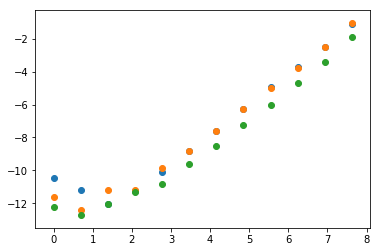

In [8]:
'''
Problem 3 (cont)
(e) What is the expected runtime of selection sort on an array with only 3 unique 
values relative to the inputs in (b) and (c)? How does this differ from the
timings for insertion sort?

'''
n = 1
n_max = 2049
data = []
while n < n_max:
    data.append(test_n(n, selection_sort))
    n = n * 2
data = np.log(np.array(data))

n_data = data[:,0]
best_data = data[:,1]
mid_data = data[:,2]
worst_data = data[:,3]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(n_data, best_data)
plt.scatter(n_data, mid_data)
plt.scatter(n_data, worst_data)




In [ ]:
'''
Problem 4: Linked lists and Pointers
https://xkcd.com/138/

Compare the following blocks of code. What are the values of a and b?
a)
a = [1,2,3]
b = a
b.append(4)

a = [1, 2, 3, 4]
b = [1, 2, 3, 4]
b is pointing to the same location in memory to a

b)
a = [1,2,3]
b = a
b = b.append(4)

print(a)
print(b)

a = [1,2,3]
b = none

c)
a = np.array([1,2,3])
b = a
b = np.append(b,4)

print(a)
print(b)

a = [1,2,3]
b = [1,2,3,4]

'''

In [12]:
'''
Example 5: Classes in Python
'''
class Student:
    # initialization / constructor
    def __init__(self, age, program):
        # attributes
        self.age = age
        self.program = program
    
    # method
    def getSummary(self):
        return str(self.age) + ', '  + str(self.program)

# create a new instance of Student
kevin = Student(27, 'MDPHD')

# modify age attribute
kevin.age = 28

# call example method
kevin.getSummary()

'28, MDPHD'

In [17]:
'''
Problem 4a: Linked List - the Node class
Online-formulation of LinkedList (moderate) 
(a) Create a Node class with argument 'data' and has attributes 'initdata' 
    (set to the argument initdata) and 'next' (set to None).
'''
# TO DO
class Node:
    def __init__(self, data):
        self.initdata = data
        self.next = None
        
'''
Problem 4b: Linked List - the LinkedList class
Assess the runtimes of the following LinkedList class methods
(a) add: add a new node to the front of the linked list 
(b) size: return the number of linked list member nodes through a linear search of the list
(c) get_index: return the pointer to the node in index position n, where n is supplied to the function.
(d) remove_index: implement a method that removes an arbitrary linked list node from a supplied node index n.
(e) enumerate_items: list all the data values of nodes in order in the list
(f) remove_item: remove the first instance of particular data value (if it exists) 
(g) search: returns True or False if query item exists in the linked list or not
'''
class LinkedList:
    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    # a O(1)
    def add(self,item):
        newNode = Node(item) # new node with an item in it that points to None
        newNode.next = self.head # newNode.next points to None
        self.head = newNode # None becomes this new node
        
    # b O(n)
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.next

        return count
    
    # c O(n)
    def get_index(self, index):
        i = 0
        current = self.head
        while i < index:
            if current is None:
                print('index exceeds length')
                break
            else:
                current = current.next
                i += 1        
        return current
    
             
    # d O(n)
    def remove_index(self,index):
        previous = None
        i = 0
        current = self.head
        while i < index:
            if current is None:
                print('index exceeds length')
                return current
            else:
                previous = current
                current = current.next
                i += 1       
            print(current.data)
        if previous is None:
            self.head = current.next
        else:
            previous.next = current.next
            
    # e
    def enumerate_items(self):
        current = self.head
        while current is not None:
            print(current.data)
            current = current.next
        
    # f
    def remove_item(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.data == item:
                found = True
            else:
                previous = current
                current = current.next

        if previous == None:
            self.head = current.next
        else:
            previous.next = current.next 
    
    # g
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.data == item:
                found = True
            else:
                current = current.next

        return found

# tests; construct a lists
mylist = LinkedList()
mylist.add('BMI2005') # 0
mylist.add('BMS') # 1
mylist.add('Biostatistics') # 2
mylist.add('RCR') # 3

# example operations/methods on instance
print('get size of list')
print(mylist.size())

print('\nget item in index 3')
print(mylist.get_index(3))
# BMS

print('\nget item in index 8 (DNE)')
mylist.get_index(8)

print('\nenumerate all items')
mylist.enumerate_items()

print('\nsearch for item RCR')
print(mylist.search('BMS'))

print('\nremove RCR')
mylist.remove_item('RCR')
print('item removed')

print('\nenumerate items again')
mylist.enumerate_items()

print('\nsearch for RCR; now gone')
print(mylist.search('RCR'))

print('\nremove index 1')
mylist.remove_index(1)

print('\nenumerate items')
mylist.enumerate_items()

get size of list
4

get item in index 3

get item in index 8 (DNE)
index exceeds length

enumerate all items


AttributeError: 'Node' object has no attribute 'data'

In [21]:
'''
Document Distance, dictionary approach
Adapted from MIT OCW

Input: Two document strings D_1 and D_2

Output: Document distance d(D_1, D_2) defined as:

Define U as the sorted array of all words found in both D_1 and D_2 
i.e. the union of D_1 and D_2. The 'word count vector' A_1 of length |U| 
has positive integer entries in A_1[i] corresponding to the number of times word i 
appears in document 1. E.g. if D_1 = 'the cat' and D_2 = 'the dog' 
then U = ['cat', 'dog', 'the'] and A_1 = [1 0 1] and A_2 = [0 1 1]

Define the document distance as the product of counts of shared words, i.e. 
d(D_1, D_2) = 1*0 + 0*1 + 1*1 = 1
Normalizing for word count (otherwise longer documents would have higher scores)
d'(D_1, D_2) = d(D_1, D_2) / ( |A_1| * |A_2| ) where |A_1| is the norm of vector A_1

d'(D_1, D_2) = dot product of A_1 and A_2

To make this more geometrically interpretable, we use np.arccos to take the inverse cosine
- a dot product of 1 evaluates to arccos of 0 meaning perfect similarity
- a dot product of 0 evaluates to arccos of 90 indicating orthogonality, or complete difference
- note that arccos returns radians

What is the runtime of your program in terms of D_1 and D_2?
'''

doc1 = 'Lorem ipsum dolor'.lower()
doc2 = 'ipsum dolor sit amet'.lower()

# 1. Get union of the lists of words (parse the docs)
# 2. Sort that union
# 3. convert from list of words to a list of counts
# 4. get the dot product / distance

import numpy as np
# parse the docs
# [x.lower() for x in ...]
doc1_list = doc1.split(' ')
doc2_list = doc2.split(' ')

# union
union = list(set(doc1_list).union(set(doc2_list)))
union.sort()

# list of counts
doc1_counts = np.zeros(len(union))
doc2_counts = np.zeros(len(union))

for i in range(len(union)):
    doc1_counts[i] = doc1.count(union[i])
    doc2_counts[i] = doc2.count(union[i])

print(doc2_counts)

#Don't worry about this dot product part
from numpy import linalg as LA
doc1_norm = LA.norm(np.array(list(doc1_counts.values())))
doc2_norm = LA.norm(np.array(list(doc2_counts.values())))
dp = total / (doc1_norm * doc2_norm)
print(np.across(dp) * 180)


[1. 1. 1. 0. 1.]


AttributeError: 'numpy.ndarray' object has no attribute 'values'